In [50]:
import pandas as pd
from scipy.sparse import hstack

In [2]:
df = pd.read_csv("spam_ham_dataset.csv")

In [3]:
df = df[["text","label_num"]]
df.head(1)

,text,label_num
0,Subject: enron methanol ; meter # : 988291\nth...,0


In [6]:
df.iloc[0,0]

"Subject: enron methanol ; meter # : 988291\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\nflow data provided by daren } .\nplease override pop ' s daily volume { presently zero } to reflect daily\nactivity you can obtain from gas control .\nthis change is needed asap for economics purposes ."

In [7]:
#natural-native language tool kit
!pip install nltk

In [8]:
# Python, PYTHON, PYtHoN, PYThon
# Python. Python, Python:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
text = df.iloc[0,0]

text = text.lower()

text = text.translate(str.maketrans('','', string.punctuation))

words = text.split() # Merhaba, Python 3 -> ["Merhaba", "Python 3"] # [Merhaba,Python,3]

words = [ word for word in words if not word.isdigit()  ]

# Stem -> Kelimeleri köküne indir. (Koşuyor->Koş)
# Remove Stopwords -> The,at,is
#words = [ ps.stem(word) for word in words if word not in stopwords.words("english") ]

" ".join(words)



'subject enron methanol meter follow note gave monday preliminari flow data provid daren pleas overrid pop daili volum present zero reflect daili activ obtain ga control chang need asap econom purpos'

In [94]:
def clean_text(text):

    text = text.lower()

    text = text.translate(str.maketrans('','', string.punctuation))

    words = text.split() # Merhaba, Python 3 -> ["Merhaba", "Python 3"] # [Merhaba,Python,3]

    words = [ word for word in words if not word.isdigit()  ]

    # Stem -> Kelimeleri köküne indir. (Koşuyor->Koş)
    # Remove Stopwords -> The,at,is
   # words = [ ps.stem(word) for word in words if word not in stopwords.words("english") ]

    return " ".join(words)

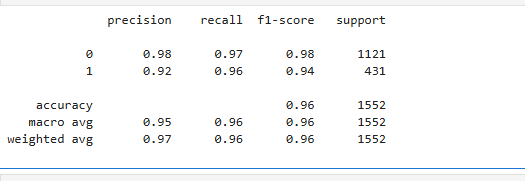

In [95]:
from sklearn.metrics import classification_report

In [96]:
clean_text("Merhaba, bu e-posta 45. python dersi hakındadır")

'merhaba bu eposta python dersi hakındadır'

In [97]:
df['clean_text'] = df['text'].apply(clean_text)

In [98]:
df.head()

,text,label_num,clean_text,text_len,num_exclam,has_http,capital_ratio
0,Subject: enron methanol ; meter # : 988291\nth...,0,subject enron methanol meter this is a follow ...,322,0,0,0.003106
1,"Subject: hpl nom for january 9 , 2001\n( see a...",0,subject hpl nom for january see attached file ...,95,0,0,0.010526
2,"Subject: neon retreat\nho ho ho , we ' re arou...",0,subject neon retreat ho ho ho we re around to ...,2515,4,0,0.000398
3,"Subject: photoshop , windows , office . cheap ...",1,subject photoshop windows office cheap main tr...,404,0,0,0.002475
4,Subject: re : indian springs\nthis deal is to ...,0,subject re indian springs this deal is to book...,332,0,0,0.003012


In [99]:

x= df["clean_text"]
y= df["label_num"]

# vectorize -> TfIDF vectorizer
# Vectorize nedir? TFIDF vectorizer nasıl çalışır #ÖDEV

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    stop_words='english',
    max_df=0.9,               
    min_df=3,                  
    ngram_range=(1,2),         
    max_features=7000 
)
X_tfidf = tfidf.fit_transform(df["clean_text"])
X_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 291269 stored elements and shape (5171, 7000)>

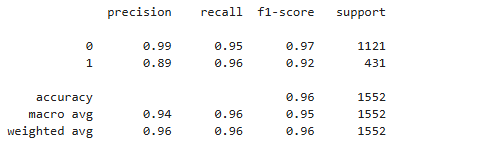

In [112]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

In [113]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB(
    alpha=0.01
)

model.fit(X_train,y_train)

MultinomialNB(alpha=0.01)

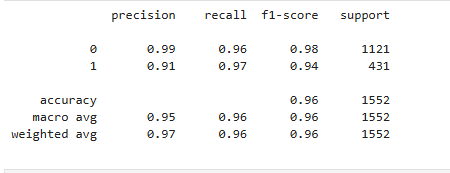

In [114]:
y_pred = model.predict(X_test)
y_pred
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1121
           1       0.92      0.96      0.94       431

    accuracy                           0.96      1552
   macro avg       0.95      0.96      0.96      1552
weighted avg       0.97      0.96      0.96      1552

